# Data Wrangling Documents and Spreadsheets

Microsoft Office documents are everywhere, especially Word and Excel documents. Of course, PDF documents are also used widely to share reports and information. In fact, certain fields, such as finance and public service, are absolutely drowning in PDF documents.

In [2]:
# Using the glob module to get all the doc files in the data directory
from glob import glob

word_files = glob(r"data\*.docx")

word_files

['data\\gfsa1999-2000.docx',
 'data\\gfsa2000-2001.docx',
 'data\\gfsa2002-2003.docx',
 'data\\gfsa2003-2004.docx',
 'data\\gfsa2005-2007.docx']

In [5]:
import textract

# Import the text file and decode same with utf-8
text = textract.process(word_files[0]).decode("utf-8")

print(text[:200])

Report on State/Territory Implementation of the Gun-Free Schools Act





School Year 1999-2000



















Final Report

July 2002





















Prepared under contract by:



Westat





The textract.process() function extracts text from any number of files, including .docx files. For other file types, we need to follow the installation instructions from textract's documentation to install other software dependencies.

In the preceding example, the text variable returned by textract is a byte string. This is the format in which data is stored on our computers. If you print out the string, it will be prefaced with b, such as b'Report on'. If you check the class with type(text), it will show it is of the bytes class. The next line, text.decode('utf-8'), converts this byte string to a character string, which shows the actual characters we can read. For the English language, this usually isn't too different, but the byte string and characters can differ greatly for other languages. The utf-8 encoding we used is a common one.

By letting Jupyter print out the variable contents, the newlines (\n) are kept. However, if we use the print() function, the newlines would be printed as blank lines.

## Extracting Insights from Word Documents: Common words and Phrases

A simple way to derive some useful insights from text is to look at common words and phrases. But before we do that, we have a few cleaning steps we want to perform first.

Cleaning text often includes the following steps:
- Removing Punctuation, numbers and stopwords
- Lowercasing words



In [6]:
# Removing Punctuations

import string

translator = str.maketrans("", "", string.punctuation + string.digits)

text = text.translate(translator)

# Lets see how the string now text
print(text[:200])

Report on StateTerritory Implementation of the GunFree Schools Act





School Year 



















Final Report

July 





















Prepared under contract by



Westat



US Department o


We need to first import the built-in string module, and then we can access a string of common punctuation and numeric digits with string.punctuation and string.digits. We use the maketrans() method of the built-in str class to remove punctuation and digits. In the case of the maketrans() function, we can provide three arguments, and each character in the third argument will map to None. The first two arguments should be left as empty strings – if these contain characters, each individual character in the first string will be converted to the corresponding character (by index) in the second string.

Once we have our translator from maketrans(), we then use the built-in method of strings in Python translate() with our translator. This maps all the characters in string.punctuation + string.digits to None, removing our punctuation and digits for us.

In [7]:
# Removing Stop words

import nltk

# Download the stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\INNO\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [10]:
from nltk.corpus import stopwords

# Get the stopwords
en_stopwords = stopwords.words("english")


# Convert the stop words to set
en_stopwords = set(en_stopwords)

# Make all text into lowercase and convert to list on " "
words = text.lower().split()

words = [word for word in words if word not in en_stopwords and len(word) > 3]

print(words[:200])

['report', 'stateterritory', 'implementation', 'gunfree', 'schools', 'school', 'year', 'final', 'report', 'july', 'prepared', 'contract', 'westat', 'department', 'educationrockville', 'test', 'text', 'report', 'stateterritory', 'implementation', 'gunfree', 'schools', 'school', 'year', 'final', 'report', 'july', 'prepared', 'department', 'education', 'prepared', 'karen', 'gray', 'beth', 'sinclair', 'westat', 'rockville', 'department', 'education', 'paige', 'secretary', 'office', 'elementary', 'secondary', 'education', 'susan', 'neuman', 'assistant', 'secretary', 'safe', 'drugfree', 'schools', 'communities', 'program', 'william', 'modzeleski', 'director', 'july', 'report', 'public', 'domain', 'authorization', 'reproduce', 'whole', 'part', 'granted', 'permission', 'reprint', 'publication', 'necessary', 'citation', 'department', 'education', 'office', 'elementary', 'secondary', 'education', 'safe', 'drugfree', 'schools', 'communities', 'program', 'report', 'stateterritory', 'implementation

Here, we first load the English stopwords from nltk with stopwords.words('english'), and then convert this list to a set. We do this because of a performance issue – when we are checking whether a word is in our stopwords, it is much faster to check whether something is in a set rather than a list.

> Searching a set is faster than a list because of how Python searches lists versus sets. For lists, we might search from the beginning to the end of the list. If our word is at the end of the list, this will take longer. With sets, our data is hashed, or converted to a number. 

Next, we lowercase the text with text.lower(), and then break up the text into individual words with the built-in split() function of strings. Lastly, we use a list comprehension to loop through each of the words and keep it if it's not in the stopwords. We also filter out any short words less than or equal to three characters long – usually these are noise in the data, such as a stray punctuation mark that wasn't in our punctuation set, or a stray letter in the data. 

In [13]:
# We now have a list of single words. Making bigrams

bigrams = list([" ".join(bg) for bg in nltk.bigrams(words)])

bigrams[:10]

['report stateterritory',
 'stateterritory implementation',
 'implementation gunfree',
 'gunfree schools',
 'schools school',
 'school year',
 'year final',
 'final report',
 'report july',
 'july prepared']

The nltk.bigrams() function takes a list of words, and returns pairs of words as tuples. We use the join() function of strings with a single space to join each bigram tuple in a single string, and this is done for each bigram with a list comprehension. Something like ('implementation', 'gunfree') becomes 'implementation gunfree'. If we examine the first three bigrams, we see the following:

### Analyzing Words and Phrases from Text

The simplest way to analyze words and phrases from our text is to look at count frequencies. The nltk package in Python makes this easy for us. We can use the FreqDist class of nltk to get frequency counts for our words (unigrams) and word pairs (bigrams):

In [14]:
# Freq Dist for single words 
ug_fdist = nltk.FreqDist(words)

# Freq Dist for bigrams
bg_fdist = nltk.FreqDist(bigrams)

Unigrams and bigrams are specific cases of n-grams, which are groups of words of size n that occur together.

The FreqDist class in nltk is handy because we can easily look at the top few n-grams, as well as plot them. For example, this will show the top 20 unigrams and bigrams, along with their number of occurrences:

In [16]:
ug_fdist.most_common(20)

[('state', 472),
 ('number', 437),
 ('question', 356),
 ('data', 343),
 ('students', 334),
 ('gfsa', 280),
 ('alternative', 248),
 ('leas', 244),
 ('expulsions', 214),
 ('school', 208),
 ('percent', 202),
 ('educational', 193),
 ('total', 188),
 ('expelled', 180),
 ('services', 179),
 ('setting', 179),
 ('firearm', 157),
 ('provided', 143),
 ('submitted', 134),
 ('high', 133)]

In [17]:
bg_fdist.most_common(20)

[('educational services', 177),
 ('services alternative', 132),
 ('students expelled', 126),
 ('percentage leas', 122),
 ('number expulsions', 120),
 ('alternative setting', 118),
 ('question state', 117),
 ('state funds', 115),
 ('changed past', 114),
 ('past months', 114),
 ('setting state', 114),
 ('question number', 112),
 ('firearm school', 78),
 ('state address', 74),
 ('address need', 74),
 ('leas provided', 73),
 ('number students', 71),
 ('gunfree schools', 70),
 ('gfsa report', 69),
 ('total number', 67)]

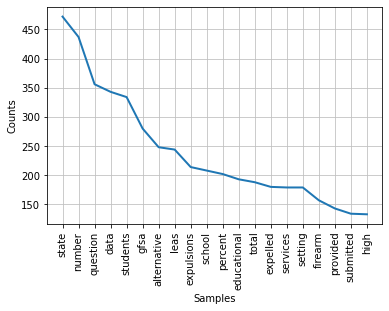

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [20]:
import matplotlib.pyplot as plt

ug_fdist.plot(20)

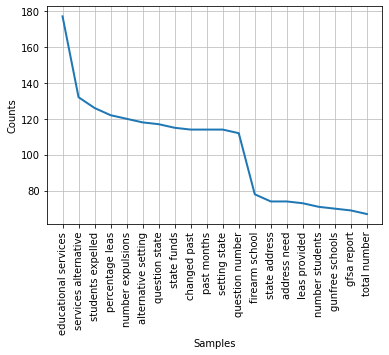

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [21]:
bg_fdist.plot(20)

We can see that many of the results of the top few words are what we'd expect, such as "students," "gfsa," and "school." There are some other interesting words in there: "expulsions," "alternative," and "law." We also see "leas," which seems strange. Examining the document shows that this is an acronym for local educational agencies (LEAs) and is used a lot in the document.

*These frequency plots are concise, clear ways to plot the word counts*. Word clouds are another method you might see being taught or used in the data science community. However, word clouds show the same data as the frequency plots, but less clearly. In general, we should avoid word clouds, but they could be used occasionally for something like a graphic on a title slide of a presentation.

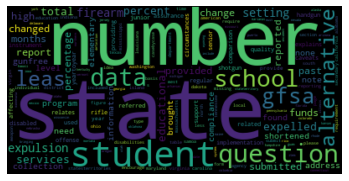

In [24]:
# Plotting a word cloud

from wordcloud import WordCloud

wordcloud = WordCloud(collocations=False).generate(" ".join(words))

plt.imshow(wordcloud, interpolation="bilinear")

plt.axis("off")

plt.show()

By default, this generates a word cloud with collocations, which are word pairs that co-occur (calculated with a few statistical methods, such as pointwise mutual information, or PMI). We set the collocations=False argument to avoid this and only plot single words.

Each word is sized in proportion to the frequency of its occurrence in the text. So, it's another way of looking at the unigram frequency, besides looking at the raw data from the FreqDist class of nltk or the line plot of the unigram frequencies. But notice how it's impossible to get a quantitative handle on the ranking of word frequencies, and things appear cluttered. Again, word clouds should be used sparingly or not at all, since they are intended to be more artistic and less about extracting useful insights.

## Creating a Pipeline for Data Cleaning Word Files

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\INNO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


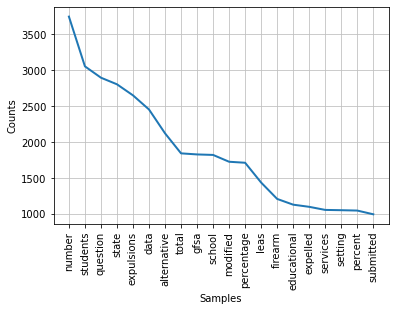

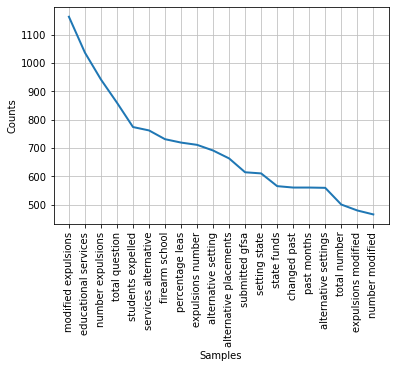

In [38]:
import os
from glob import glob
import textract
import nltk
import string
import matplotlib.pyplot as plt

# Download the stopwords
nltk.download("stopwords")

en_stopwords = set(nltk.corpus.stopwords.words("english"))

def create_fdist_visualizations(path): 
    """
    Takes a path to a folder with .docx files, reads and cleans text,
    then plots unigram and bigram frequency distributions.
    """
    # Get the list of files in the path with a .docx extension
    word_docs = glob(os.path.join(path, "*.docx"))
    
    # Join the strings content in all the files with a space separator
    text = " ".join([textract.process(word).decode("utf-8") for word in word_docs])
    
    # Remove Punctuation and stop words
    translator = str.maketrans("", "", string.punctuation + string.digits)
    
    text = text.translate(translator)
    
    # Get a list of words
    words = text.lower().split()
    
    words = [word for word in words if word not in en_stopwords and len(word) > 3]
    
    # Get a unigram
    unigram_fd = nltk.FreqDist(words)
    
    # Get a bigram
    bigrams = list([" ".join(bg) for bg in nltk.bigrams(words)])
    bigrams_fd = nltk.FreqDist(bigrams)
    
    # Plot the unigram and bigram
    unigram_fd.plot(20)
    bigrams_fd.plot(20)
    
    
    

create_fdist_visualizations(path="data/")

## Reading Text From PDFs

Although we may run into Word files, we will probably see more PDF files in the wild. Luckily, there are several packages for dealing with PDFs in Python. One of them is the same package we used before, textract. There are several others:

- pdfminer.six
- tika
- pymupdf
- pypdf2

I will use pdfminer.six to read PDFs here, although there are not huge differences between the three packages. The tika package requires installation of Java on your system, which you can do with conda install -c conda-forge openjdk if you don't have it installed. The tika package does have one advantage over the others: it returns all the metadata about the PDF file when it reads it. This includes things such as when the file was created, who created it, and how it was created.

In [4]:
from glob import glob

# List of pdfs avaialable

pdf_files = glob(r"data\*.pdf")

pdf_files

['data\\2012.07816.pdf',
 'data\\2012.08496.pdf',
 'data\\2012.12144.pdf',
 'data\\2012.15358.pdf',
 'data\\2101.02013.pdf',
 'data\\2101.05273.pdf',
 'data\\2101.05638.pdf',
 'data\\2101.06119.pdf',
 'data\\2101.09384.pdf',
 'data\\2101.12150.pdf']

In [19]:
import os
import textract
import chardet

pdf_file = os.path.join("data/", "2012.07816.pdf")

# Extract the text and parse it from byte to string decoded with utf-8
text = textract.process(pdf_file, method = 'tesseract').decode("utf-8")


print(text[:500].split())

['2012.07816v1', '[cs.LG]', '14', 'Dec', '2020', 'arXiv', 'ENABLING', 'COLLABORATIVE', 'DATA', 'SCIENCE', 'DEVELOPMENT', 'WITH', 'THE', 'BALLET', 'FRAMEWORK', 'Micah', 'J.', 'Smith!', 'Jiirgen', 'Cito?>', 'Kelvin', 'Lu!', 'Kalyan', 'Veeramachaneni!', 'ABSTRACT', 'While', 'the', 'open-source', 'model', 'for', 'software', 'development', 'has', 'led', 'to', 'successful', 'large-scale', 'collaborations', 'in', 'build-', 'ing', 'software', 'systems,', 'data', 'science', 'projects', 'are', 'frequently', 'developed', 'by', 'individuals', 'or', 'small', 'groups.', 'We', 'describe', 'challenges', 'to', 'scaling', 'data', 'science', 'collaborations', 'and', 'present', 'a', 'novel', 'ML']


In [18]:
lines = text.split("\n")

cleaned_lines = []

for ln in lines:
    if len(ln) == 0:
        continue
    if ln[-1] == "-":
        cleaned_lines.append(ln[:-1])
    else:
        cleaned_lines.append(ln + " ")
        
cleaned = "".join(cleaned_lines)

cleaned[:200]

'2012.07816v1 [cs.LG] 14 Dec 2020\r \r arXiv\r \r ENABLING COLLABORATIVE DATA SCIENCE DEVELOPMENT WITH THE\r BALLET FRAMEWORK\r \r Micah J. Smith! Jiirgen Cito?> Kelvin Lu! Kalyan Veeramachaneni!\r \r ABSTRACT\r'

Here, we first split up the text into lines by splitting on the newline character, \n. Then we create an empty list to hold the cleaned data and start looping through the existing lines. Some of the lines are blank, so if the length of the characters in the line is 0 (len(l) == 0), then we use the Python keyword continue to move on to the next line in the loop. If our line ends with a hyphen character, we remove that character by indexing the line up to the last character (ln[:-1]), and then append this line to the cleaned lines. Otherwise, we append the line plus a space to the cleaned lines.

Lastly, we join together our cleaned lines without any spaces between the lines. In this way, our hyphenated words have the hyphens removed, and other words are unchanged.

As before, we can use the same text cleaning and analysis steps, and put this all in a function

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\INNO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


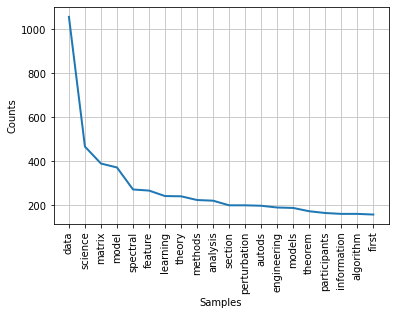

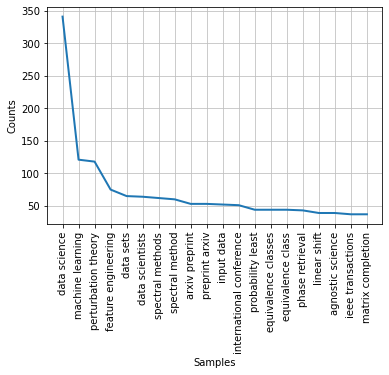

In [23]:
import os
from glob import glob
import textract
import nltk
import string
import matplotlib.pyplot as plt


# Download the stopwords
nltk.download("stopwords")

en_stopwords = set(nltk.corpus.stopwords.words("english"))

def create_fdist_visulizations(path, extension="docx"):
    """
    Take a path to a folder with .docx files, reads and cleans text,
    then plots unigram and bigram frequency distributions
    """
    docs = glob(os.path.join(path, f"*.{extension}")) 
    if extension in ["doc", "docx"]:
        text = " ".join(textract.process(word).decode("utf-8") for word in docs)
        
    elif extension == "pdf":
        text = " ".join(textract.process(pdf, method = 'tesseract').decode("utf-8") for pdf in docs)
        lines = text.split("\n")
        cleaned_lines = []

        for line in lines:
            if len(line) == 0:
                continue
            if line[-1] == "-":
                cleaned_lines.append(line[:-1])
            else:
                cleaned_lines.append(line + " ")

        text = "".join(cleaned_lines)
    
    # Remove Punctuation and stop words
    translator = str.maketrans("", "", string.punctuation + string.digits)
    
    text = text.translate(translator)
    
    # Get a list of words
    words = text.lower().split()
    
    words = [word for word in words if word not in en_stopwords and len(word) > 3]
    
    # Get a unigram
    unigram_fd = nltk.FreqDist(words)
    
    # Get a bigram
    bigrams = list([" ".join(bg) for bg in nltk.bigrams(words)])
    bigrams_fd = nltk.FreqDist(bigrams)
    
    # Plot the unigram and bigram
    unigram_fd.plot(20)
    bigrams_fd.plot(20)
    

create_fdist_visulizations(path="data/", extension= "pdf")

## Using Pandas to Wrangle Excel Files

We will analyze some Excel files from the Midcontinent Independent System Operator (MISO) organization, which provides electricity to large parts of the US and Canada. In this section, imagine you are working for Dynasty Power Inc. as a junior power analyst analyzing energy markets (this is actually a job Dynasty Power is hiring for at the time of writing). The idea is that we are buying and selling energy futures contracts in order to make a profit, and this may also help to stabilize the price of energy. MISO publishes a lot of data (https://www.misoenergy.org/markets-and-operations/real-time--market-data/market-reports/), and our first task is to analyze some aspects of the Multiday Operating Margin (MOM) forecast report the "Summary" section of MISO's market reports page. We've been tasked with analyzing the wind and energy load forecasts from the reports. Our deliverable is to create an Excel spreadsheet with 5-day forecasts for wind power and electricity load each day in the historical data, as well as perform some analysis on the data.

Before jumping straight to Python and loading the data, it's always a good idea to open up one of the Excel files before getting to work on them – this helps us get familiar with the layout of the data and Excel file. We notice from the file that it has several sheets, but we can get the data we need from the MISO sheet from the rows Renewable Forecast and Projected Loadl. Note that these rows are also in the regional breakdown tabs (for example, the SOUTH tab), so we could easily extend our Python code to cover the individual regions. We can see that the first four rows of the sheet don't contain any information of interest.

In [1]:
from glob import glob

import pandas as pd

# Get a list of all MISO files in the data directory
excel_files = glob("data\*mom.xlsx")

# Read a single excel file
miso_df = pd.read_excel(excel_files[0], sheet_name="MISO", skiprows=4, nrows=17, index_col=0, usecols=range(7))

miso_df.head()

C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,1/24/21 HE 20,1/25/21 HE 20**,1/26/21 HE 20**,1/27/21 HE 20**,1/28/21 HE 09**,1/29/21 HE 09**
RESOURCE COMMITTED,72247.3,67591.5,76485.2,77937.5,74683.8,67994.4
RESOURCE UNCOMMITTED,31091.0,52089.8,42849.8,42446.9,45850.4,53283.5
Uncommitted >16 hr,2383.8,14741.5,10861.6,11006.6,13077.6,18652.0
Uncommitted 12-16 hr,3475.0,7554.5,6432.0,5490.0,4923.0,5748.0
Uncommitted 8-12 hr,4908.9,6723.5,5818.5,5498.5,6128.5,6452.5


I first list the Excel files ending in *mom.xlsx, as we did with the .pdf and .docx files. I use pandas' read_excel() function, and provide several arguments: the filename, the worksheet name (MISO), how many rows to skip (skiprows), how many rows to parse (nrows, which covers the data we want to parse here), which column to use as the index (we are using the first column, A, with index_col=0), and how many columns to parse (columns 0 through 6 using usecols=range(7)).

In [3]:
# Check the shape of the dataset

miso_df.shape

(17, 6)

In [6]:
# Check for NaN
miso_df.isna().sum()

1/24/21 HE 20      2
1/25/21 HE 20**    2
1/26/21 HE 20**    2
1/27/21 HE 20**    2
1/28/21 HE 09**    2
1/29/21 HE 09**    2
dtype: int64

In [8]:
# Lets remove the NaN's
miso_df.dropna(inplace=True)

# Check the new shape of the df
miso_df.shape

(15, 6)

Next, we want to convert the projected load and renewable forecast into a DataFrame. The method shown here is one way to do this, although there are certainly many other ways to do it. First, we obtain the data from both the load and renewable rows:

In [18]:
# Using loc to call the index row / for index filtering
load = miso_df.loc["Projected Load", :].to_list()

wind = miso_df.loc["Renewable Forecast", :].to_list()

We use df.loc[] to access the DataFrame by index, and use the two index values that match the rows we want. We convert these values to lists so that we can easily concatenate them in the next steps.



In [23]:
# Creating labels 
load_labels = [f"load_d{data}" for data in range(1, 7)]

wind_labels = [f"wind_d{data}" for data in range(1, 7)]

I am using a dictionary comprehension in the first line to create a dictionary with values such as {'wind_d1': 5373.7}. Notice that we use the zip() function, which returns tuples from the two lists we give it. If you wanted to see what this looks like, try printing out list(zip(load_labels + wind_labels, loads + wind)). The zip() function returns a zip object, so we need to convert it to a list to be able to print it out. This allows us to iterate through the matching column label and value, and store these as col and val variables in our dictionary comprehension. Notice that we are concatenating the label and value lists here with the plus sign operator (concatenation operator for lists).

In [24]:
data_dict = {col: value for col, value in zip(load_labels + wind_labels, load + wind)}

data_dict

{'load_d1': 77528.0,
 'load_d2': 81575.0,
 'load_d3': 82841.0,
 'load_d4': 81974.0,
 'load_d5': 82897.0,
 'load_d6': 83236.0,
 'wind_d1': 5373.7,
 'wind_d2': 14352.5,
 'wind_d3': 6350.8,
 'wind_d4': 4666.5,
 'wind_d5': 7529.2,
 'wind_d6': 14353.6}

Our next step after that is to get the date of the data from the filename. Each filename has the date in a format such as 20210123, which is a 4-digit year, followed by a 2-digit month, and then a 2-digit day. Luckily, the pd.to_datetime() function works well at parsing this particular date format. Of course, if that doesn't work, we can always specify the format argument in to_datetime(), using Python's datetime format codes (the link to the format codes can be found on the pandas to_datetime() documentation web page).

In [28]:
# Getting the date from the file name
date = pd.to_datetime(excel_files[0].split("\\")[-1].split("_")[0])

In [30]:
final_df = pd.DataFrame.from_records(data=data_dict, index=[date])

final_df

,load_d1,load_d2,load_d3,load_d4,load_d5,load_d6,wind_d1,wind_d2,wind_d3,wind_d4,wind_d5,wind_d6
2021-01-23,77528.0,81575.0,82841.0,81974.0,82897.0,83236.0,5373.7,14352.5,6350.8,4666.5,7529.2,14353.6


In [37]:
import os


def extract_miso_forecasts(path):
    """
    Takes a filepath to .xlsx MISO MOM reports and extracts wind and load forecasts.
    Saves data to an Excel file - miso_forecasts, and returns the DF
    """
    # Get the excel files
    excel_files = glob(os.path.join(path, "*mom.xlsx"))
    full_forecast_df = None
    for file in excel_files:
        # Read the content of the excel file
        miso_df = pd.read_excel(file, sheet_name="MISO", skiprows=4, nrows=17, index_col=0, usecols=range(7)) 
        
        # Using loc to call the index row / for index filtering
        load = miso_df.loc["Projected Load", :].to_list()
        wind = miso_df.loc["Renewable Forecast", :].to_list()
        
        # Creating labels 
        load_labels = [f"load_d{data}" for data in range(1, 7)]
        wind_labels = [f"wind_d{data}" for data in range(1, 7)]
        
        # Getting the date from the file name
        date = pd.to_datetime(file.split("\\")[-1].split("_")[0])
        
        # Create and Append the DataFrame        
        data_dict = {col: value for col, value in zip(load_labels + wind_labels, load + wind)}
        forecast_df = pd.DataFrame.from_records(data=data_dict, index=[date])
        
        if full_forecast_df is None:
            full_forecast_df = forecast_df.copy()
        
        else:
            full_forecast_df = pd.concat([full_forecast_df, forecast_df])
        
    
    # Sort index
    full_forecast_df.sort_index(inplace=True)
    # Create an excel file
    full_forecast_df.to_excel("miso_forecasts.xlsx")
    return full_forecast_df
        
        
final_df = extract_miso_forecasts(path = "data/")

final_df

C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openp

,load_d1,load_d2,load_d3,load_d4,load_d5,load_d6,wind_d1,wind_d2,wind_d3,wind_d4,wind_d5,wind_d6
2021-01-23,77528.0,81575.0,82841.0,81974.0,82897.0,83236.0,5373.7,14352.5,6350.8,4666.5,7529.2,14353.6
2021-01-24,83310.0,82300.0,82452.0,84568.0,84231.0,72855.0,15996.5,7030.6,5094.1,7496.4,5232.0,16207.2
2021-01-25,83135.0,84945.0,86705.0,86325.0,73520.0,73509.0,8529.6,4371.5,9566.0,7825.3,15260.2,12907.8
2021-01-26,84898.0,88174.0,86816.0,74929.0,75048.0,80868.0,4179.6,9625.7,7896.6,14690.1,10564.0,4949.9
2021-01-27,89361.0,87024.0,75566.0,75378.0,81915.0,83146.0,9498.3,10986.1,13680.6,7576.2,4346.1,7028.9
2021-01-28,89178.0,75962.0,76822.0,84288.0,85784.0,83641.0,11501.3,10990.8,11801.1,5366.1,8575.5,12746.8
2021-01-29,76507.0,77515.0,84425.0,85973.0,83684.0,80428.0,14455.9,12325.0,5274.5,8690.1,13342.1,17648.5
2021-01-30,78042.0,85221.0,86471.0,83698.0,80626.0,81255.0,10986.3,4826.3,6809.1,12136.9,14397.5,8679.2
2021-01-31,85628.0,87382.0,85358.0,81003.0,82059.0,78372.0,4915.3,7277.6,11920.2,17697.2,8421.2,16646.6
2021-02-01,88736.0,86778.0,81931.0,82587.0,78194.0,83207.0,6676.5,13675.4,20155.6,14938.9,12661.9,11967.1


We first import the os module so that we can use it for os.path.join() again, as in the previous section. We then create an empty variable, full_forecast_df, with the value None. In this way, we can create our DataFrame from scratch when reading the first file, and then append to it when reading subsequent files. Next, we loop through each Excel file, performing the same data extraction steps we did before. Once we have our DataFrame, we check whether the full_forecast_df variable is None, and if so, we copy our current DataFrame (forecast_df) into that variable.

Otherwise, we use the pd.concat method of DataFrames to add our current DataFrame (forecast_df) to the full_forecast_df one. After we exit the loop and have parsed all the data into full_forecast_df, we sort the index, updating the DataFrame in place. This will ensure that our data is sorted from the earliest to latest date, just in case we read the files out of order. Lastly, we write the data to an Excel file with pandas' DataFrame.to_excel() function, and then return the full DataFrame from the function. We can now use our function like this:

### Analyze the data


<AxesSubplot:>

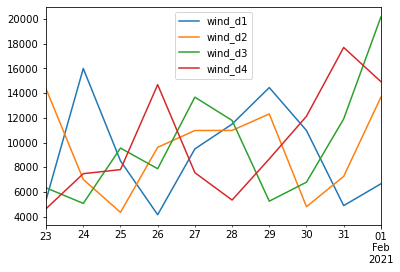

In [39]:
import matplotlib.pyplot as plt

final_df[["wind_d1", "wind_d2", "wind_d3", "wind_d4"]].plot()

However, that plot is difficult to read, since the forecasts for the same day in the future are offset by 1 and 2 days for d2 and d3, respectively. Instead, we can shift the d2 forecasts forward by a day and the d3 forecasts forward by 2 days with the shift() method of DataFrames

<AxesSubplot:>

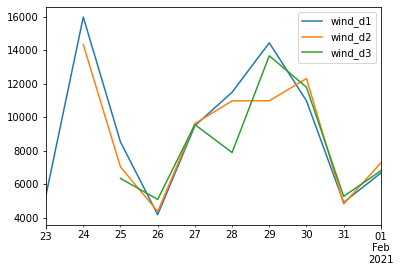

In [42]:
plot_df = pd.concat([final_df['wind_d1'], final_df['wind_d2'].shift(), final_df['wind_d3'].shift(2)], axis=1)

plot_df.plot()

This shift() function moves the data in the DataFrame forward, relative to the index, by an offset (default of 1). It can also move data backward relative to the index with a negative value for the argument to shift(). This has the effect of lining up the 1-, 2-, and 3-day predictions in our DataFrame so that they are all predictions for the same date in each row. Then we add one day to the index with a pandas DateOffset of 1 day, so that the index will now be the day the forecast is predicting for. When we plot the data, it is now easy to interpret: We can see that most of the forecasts are remarkably similar for the predictions 1 and 3 days into the future, but there are some days where they change drastically.

<AxesSubplot:>

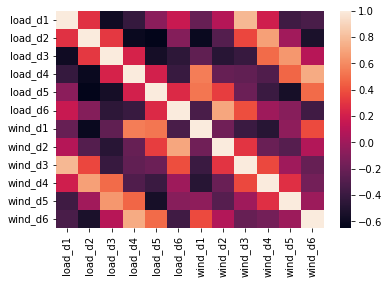

In [43]:
import seaborn as sns

sns.heatmap(final_df.corr())

## Using Openpyxl

For most situations, reading and writing Excel files with pandas works just fine. For more intricate situations, we can move down to a lower-level package (which pandas uses for .xlsx files): openpyxl. This package has a lot a functionality: we can read data cell by cell from Excel workbooks, we can write data, and write complex data such as Excel formulas, and we can read complex data such as hyperlinks in data cells.

Here, we will look at how we can use openpyxl for handling messy data that may have typos as a result of manual entry. For example, what if the MISO data was created by hand and there were typos in the worksheet names and mistakes in the data labels in the worksheets? One way to deal with this is fuzzy string matching, which is a breeze in Python.

Let's first load our first Excel file from our list of files with openpyxl:

In [51]:
from openpyxl import load_workbook

wb = load_workbook(excel_files[0])

print(wb.sheetnames)

['MISO', 'NORTH', 'CENTRAL', 'NORTH+CENTRAL', 'SOUTH', 'WIND UNCERTAINTY', 'LOAD UNCERTAINTY', 'OUTAGE']


In [52]:
# Fuzzy searching strings

from Levenshtein import ratio

miso_sheetname = [name for name in wb.sheetnames if (ratio(name.lower(), "miso") > 0.8)][0]

miso_sheetname

'MISO'

This calculates the Levenshtein distance between two strings, which is essentially the number of characters that need to be edited to make the strings match. The ratio() function returns a number between 0 (no similarity) and 1 (a perfect match). Similar functions are available through the fuzzywuzzy package, which actually uses the python-levenshtein package.

Here, we are using a list comprehension to loop through the worksheet names. Then we use the ratio() function to compare the lowercased version of each worksheet name with the 'miso' string. If this returns a value greater than 0.8, meaning roughly 80% or more of the two strings match, then we keep that string in our list.

Then we simply get the first index of the list of matches as a quick-and-dirty solution. This code would need to be improved to use on real-world data. For example, you might create a dictionary of worksheet names as keys with similarity scores as values, and choose the most similar string to 'miso'.

In [53]:
# Access the worksheet name

miso = wb[miso_sheetname]

miso

<Worksheet "MISO">

Now, let's consider that the data in the Excel workbooks may have been entered by hand, and there may be some typos. This causes the row that should be "Renewable forecast" to sometimes be a slightly different string, such as "Renewwable forecast", which would not work in our extract_miso_forecasts() function we created earlier. We can again use fuzzy string matching, along with the ability of openpyxl to iterate through rows:

In [55]:
for row in miso.iter_rows():
    for cell in row:
        if (ratio(str(cell.value).lower(), "renewable forecast") > 0.8):
            print(cell.value)
            print(f"row, column: {cell.row}, {cell.column}")

Renewwwwble Forecast
row, column: 13, 1


Here, we first use the iter_rows() method of our workbook object to go through each row. The row variable contains a list of the cells for each row, and we then check whether the value of that cell has a string 80% or more similar to "renewable forecast". Notice that we are converting cell.value to a string – this is because some cell values are None, and others are numbers. Without this string conversion, we get an error. Once we find a cell that matches, we print out the value and the row and column numbers. When we run the code, we find our needle in the haystack.

These are some clever ways in which we can use openpyxl to parse messy data, which we are certain to encounter when doing data science. Keep in mind that openpyxl has a lot of other capabilities, including advanced abilities for extracting data from Excel files and writing data or even formulas to Excel files